# Overview

In this notebook, we illustrate some commonly used augmentations for images in various libraries, and perform inference with both TensorFlow and PyTorch pipelines.

A key augmentation that we will like to illustrate is the insect augmentation, or rather an augmentation that performs an overlay of small artifacts onto the images with a certain probability. A variant first surfaced in the Melanoma Detection competition recently, created by Roman. I've also adapted it in a recent Global Wheat Detection competition. 

## Version Notes

- version 1 to 13: uses images from Casava leaf classification competition
- version 14 onwards: uses images from Plant Pathology 2021, Herbarium 2021, and iWildcam 2021 competitions

In [1]:
#!pip install imutils
import sys
sys.path.append('/Users/nursultan/Desktop/final project/kazakh letters')

# Imports

In [155]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
import albumentations as A
import imgaug.augmenters as iaa
from imgaug import parameters as iap
from skimage.transform import resize
import keras
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [96]:
kazakh_alphabet_l = 'аәбвгғдеёжзийкқлмнңоөпрстуұүфхһцчшщъыіьэюя'
kazakh_alphabet_u = 'АӘБВГҒДЕЁЖЗИЙКҚЛМНҢОӨПРСТУҰҮФХҺЦЧШЩЪЫІЬЭЮЯ'

kazakh_alphabet_u=  [i for i in kazakh_alphabet_u]
kazakh_alphabet_l = [i for i in kazakh_alphabet_l]

print(kazakh_alphabet_u)
print(kazakh_alphabet_l)

['А', 'Ә', 'Б', 'В', 'Г', 'Ғ', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Қ', 'Л', 'М', 'Н', 'Ң', 'О', 'Ө', 'П', 'Р', 'С', 'Т', 'У', 'Ұ', 'Ү', 'Ф', 'Х', 'Һ', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'І', 'Ь', 'Э', 'Ю', 'Я']
['а', 'ә', 'б', 'в', 'г', 'ғ', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'қ', 'л', 'м', 'н', 'ң', 'о', 'ө', 'п', 'р', 'с', 'т', 'у', 'ұ', 'ү', 'ф', 'х', 'һ', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'і', 'ь', 'э', 'ю', 'я']


/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/а


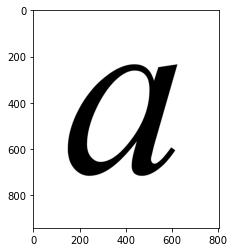

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/а


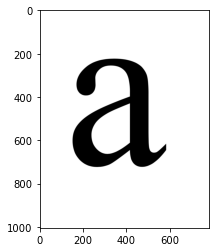

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ә


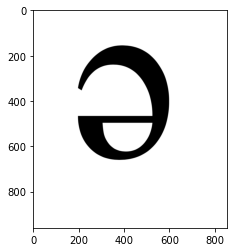

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ә


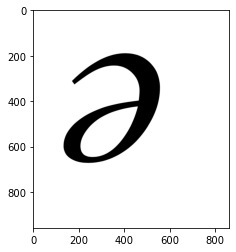

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/б


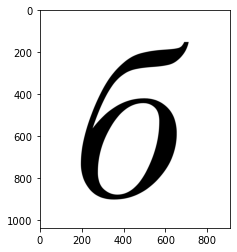

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/б


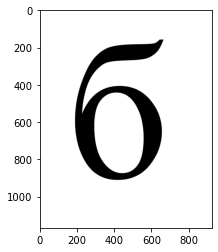

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/б


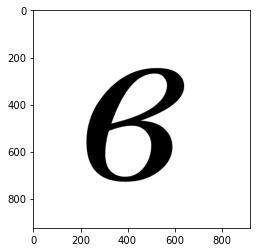

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/в


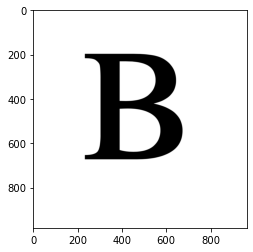

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/г


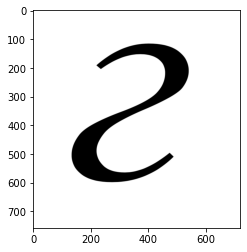

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/г


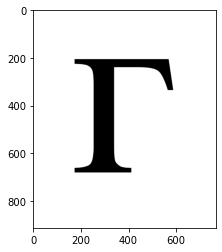

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ғ


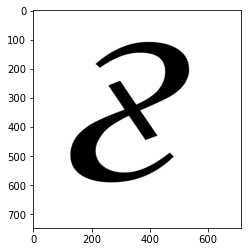

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ғ


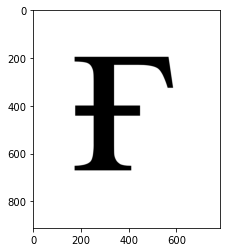

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/д


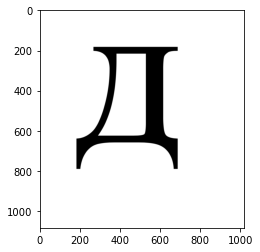

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/д


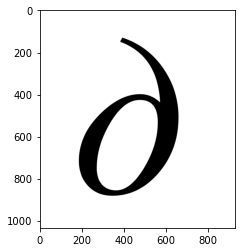

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/е


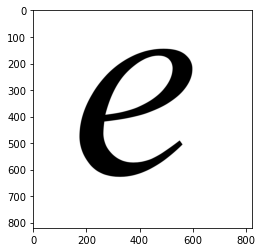

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/е


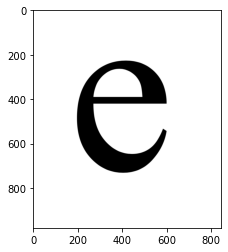

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ё


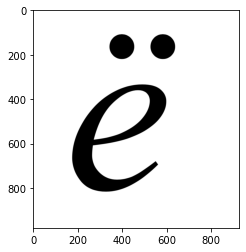

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ё


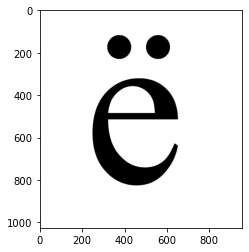

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ж


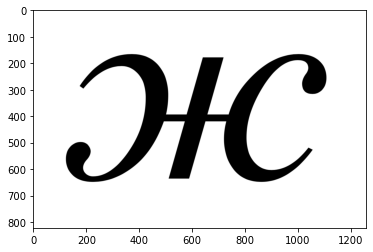

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ж


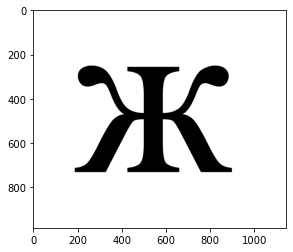

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/з


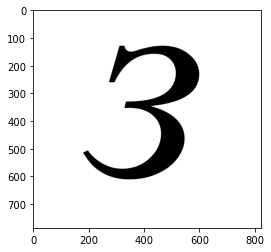

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/з


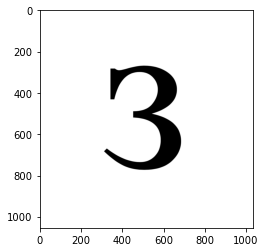

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/и


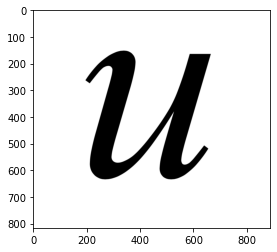

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/и


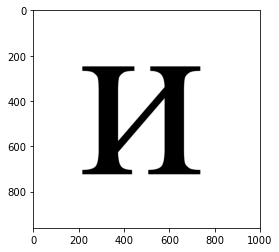

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/й


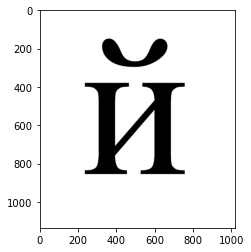

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/й


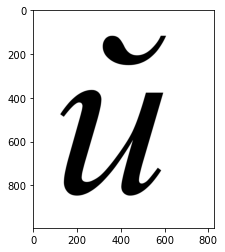

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/к


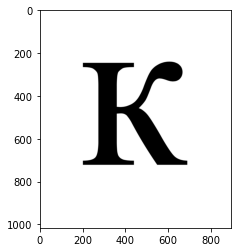

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/к


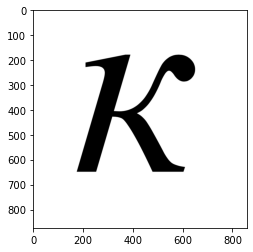

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/қ


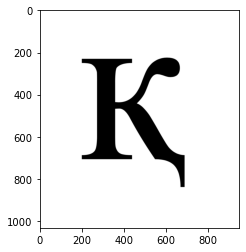

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/қ


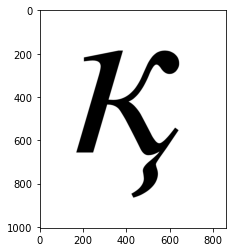

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/л


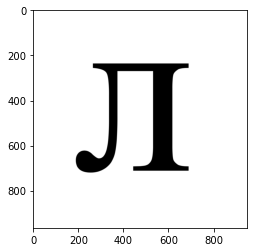

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/л


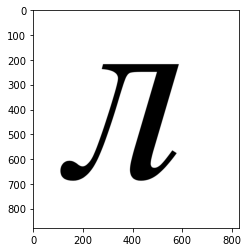

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/м


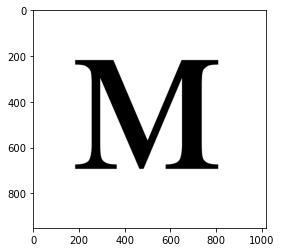

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/м


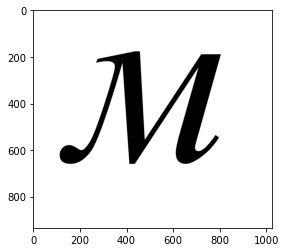

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/н


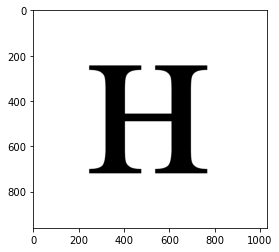

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/н


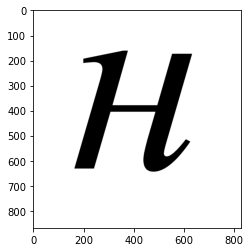

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ң


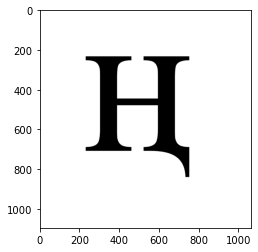

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ң


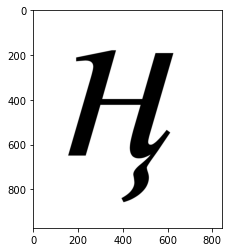

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/о


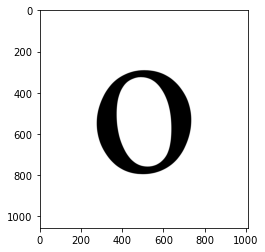

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/о


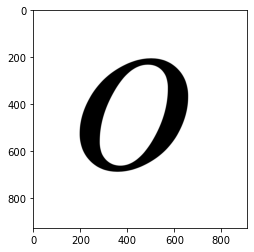

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ө


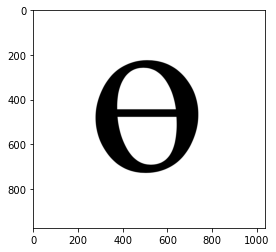

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ө


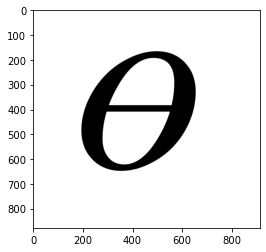

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/п


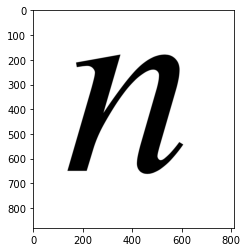

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/п


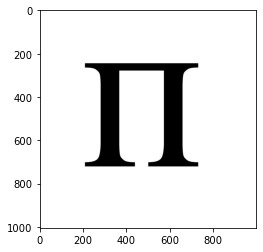

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/р


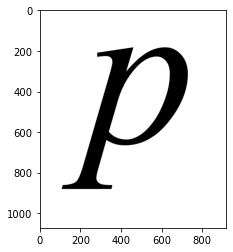

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/р


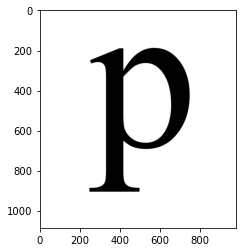

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/с


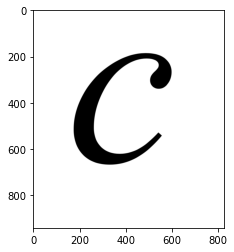

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/с


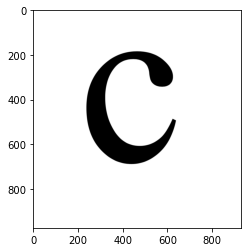

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/т


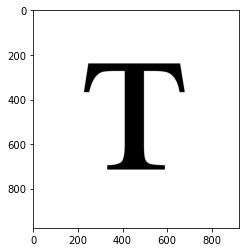

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/т


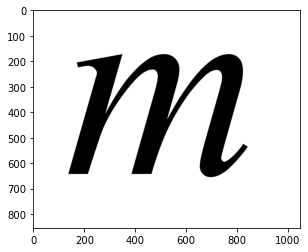

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/у


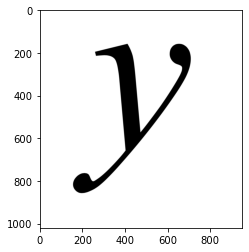

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/у


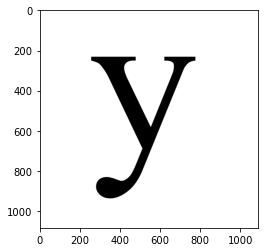

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ұ


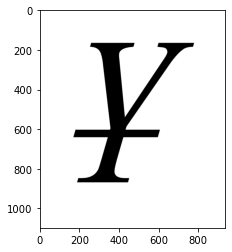

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ұ


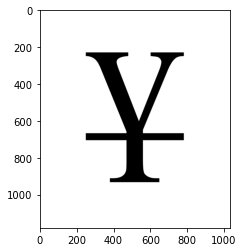

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ү


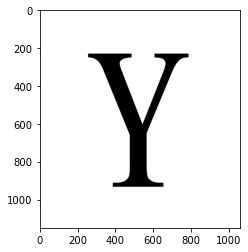

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ү


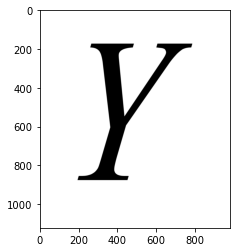

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ф


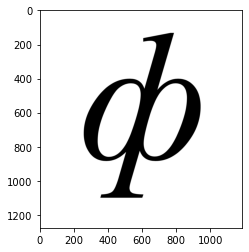

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ф


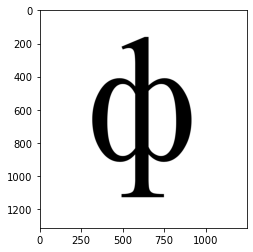

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/х


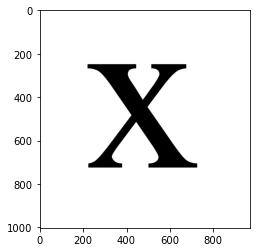

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/х


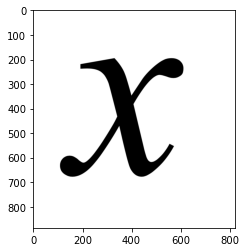

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/һ


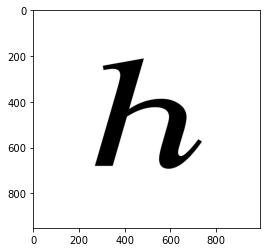

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/һ


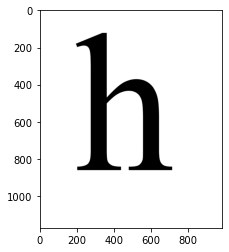

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ц


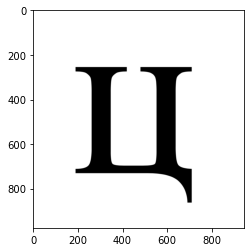

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ц


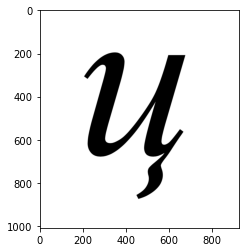

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ч


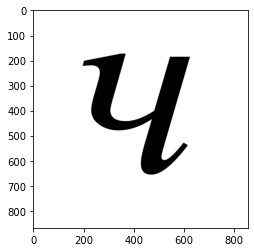

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ч


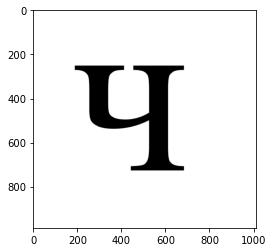

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ш


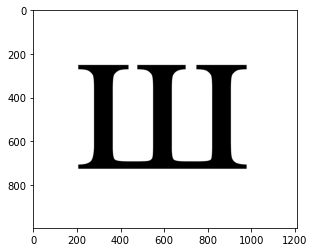

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ш


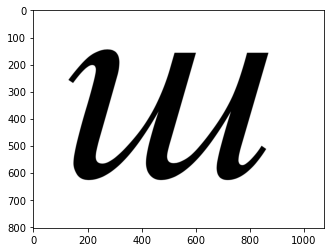

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/щ


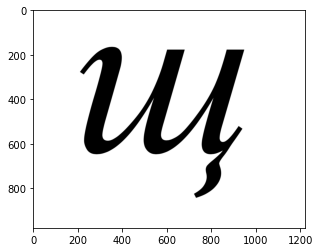

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/щ


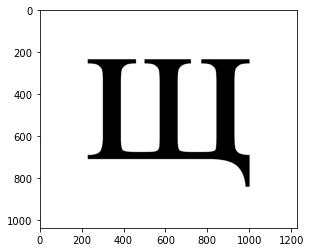

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ъ


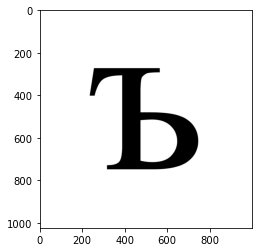

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ъ


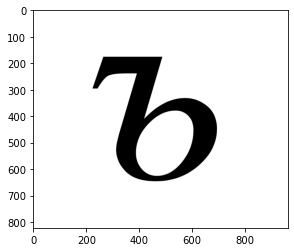

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ы


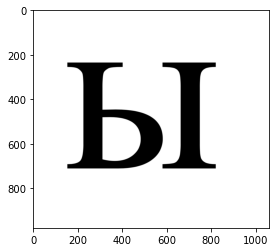

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ы


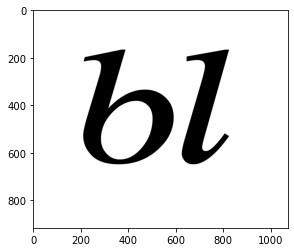

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/і


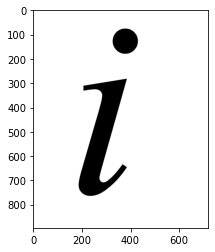

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/і


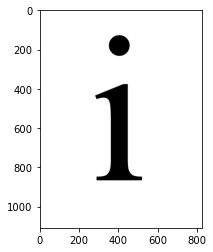

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ь


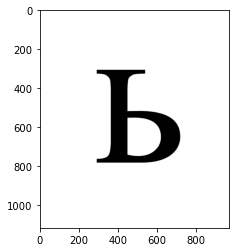

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ь


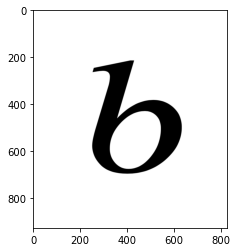

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/э


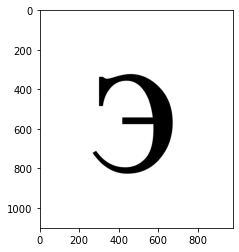

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/э


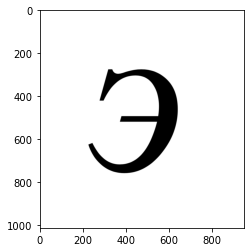

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ю


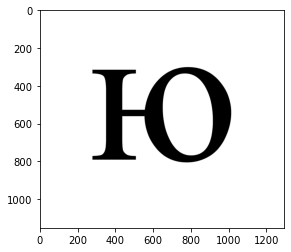

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/ю


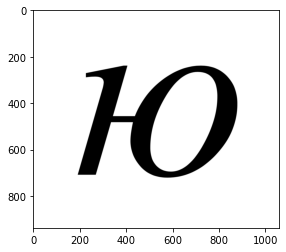

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/я


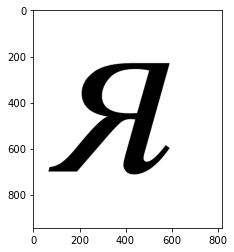

/Users/nurmukhammed/Desktop/NLP/final project/kazakh letters/Lower/я


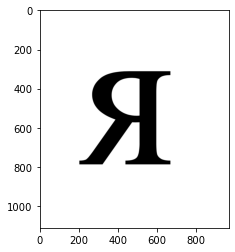

In [41]:
categories = kazakh_alphabet_l
lower_path = '/Users/nursultan/Desktop/final project/kazakh letters/Lower/'
upper_path = '/Users/nursultan/Desktop/final project/kazakh letters/Upper/'

for category in categories:
    path= os.path.join(lower_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = plt.imread(os.path.join(path,img),'RGB')  
            print(path)
            plt.imshow(img_array)
            plt.show()


In [33]:
print(img_array.shape)

(1112, 966, 4)


In [34]:
print(img_array.T[0].shape)
print(img_array.T[0])

(966, 1112)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


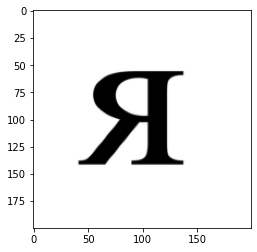

In [73]:
img_size = 200
new_array = resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [97]:
labeled_lower_data = []
label_lower_name = {}
labeled_upper_data = []
label_upper_name = {}

def image_to_matrix_lower():
    for category in kazakh_alphabet_l:
        path= os.path.join(lower_path+category)
        class_num = kazakh_alphabet_l.index(category)
        label_lower_name[category] = class_num
        for img in os.listdir(path):
            try:
                img_array= plt.imread(os.path.join(path,img),  'RGB')
                new_array = resize(img_array, (img_size, img_size))
                labeled_lower_data.append([new_array, class_num])
            except Exception as e:
                pass
            
def image_to_matrix_upper():
    for category in kaza kh_alphabet_u:
        path= os.path.join(upper_path+category)
        class_num = kazakh_alphabet_u.index(category)
        label_upper_name[category] = class_num
        for img in os.listdir(path):
            try:
                img_array= plt.imread(os.path.join(path,img),  'RGB')
                new_array = resize(img_array, (img_size, img_size))
                labeled_upper_data.append([new_array, class_num])
            except Exception as e:
                pass            
            
            
image_to_matrix_lower()
image_to_matrix_upper()

In [63]:
np.array(labeled_data)[4][1]

<ipython-input-63-6a469642e64a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(labeled_data)[4][1]


2

<ipython-input-65-fe088521ac1c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.imshow(np.array(labeled_data)[4][0])


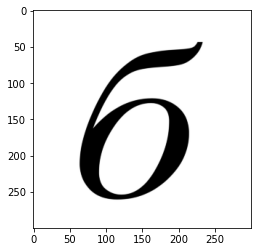

In [65]:
plt.imshow(np.array(labeled_data)[4][0])

# Read Sample Image without Augmentations

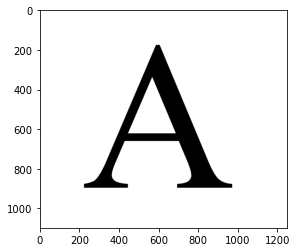

In [108]:
chosen_image = cv2.imread(image_path)
plt.imshow(chosen_image)

# Augmentation with ImageDataGenerator

In [227]:
a = 5.42865482e-37
'{:.38f}'.format(a)

'0.00000000000000000000000000000000000054'

<ipython-input-223-f809346cb753>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(330 + 1 + i)


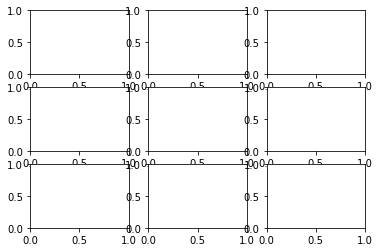

In [223]:
for category in kazakh_alphabet_l:
    path= os.path.join(lower_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = cv2.imread(os.path.join(path,img))  
            if img_array is None:
                pass
            else:
                samples = np.expand_dims(img_array, 0)
                datagen = ImageDataGenerator(brightness_range=[0.1, 1.5])
                it = datagen.flow(samples, batch_size=1)
                img_matrix_list = []
                for i in range(9):
                    # define subplot
                    plt.subplot(330 + 1 + i)
                    # generate batch of images
                    batch = it.next()
                    # convert to unsigned integers for viewing
                    image = batch[0].astype('uint8')
                    # plot raw pixel data
                    img_matrix_list.append(image)
            for title, im in zip(range(len(img_matrix_list)), img_matrix_list):
                imageio.imsave(lower_path+category+'/'+str(title)+'.png', im)

<ipython-input-224-4e6a05ff33f8>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(330 + 1 + i)


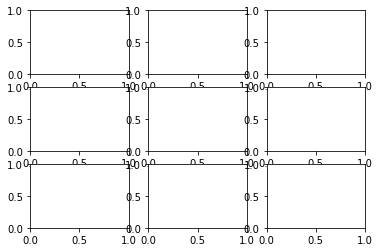

In [224]:
for category in kazakh_alphabet_u:
    path= os.path.join(upper_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = cv2.imread(os.path.join(path,img))  
            if img_array is None:
                pass
            else:
                samples = np.expand_dims(img_array, 0)
                datagen = ImageDataGenerator(brightness_range=[0.1, 1.5])
                it = datagen.flow(samples, batch_size=1)
                img_matrix_list = []
                for i in range(9):
                    # define subplot
                    plt.subplot(330 + 1 + i)
                    # generate batch of images
                    batch = it.next()
                    # convert to unsigned integers for viewing
                    image = batch[0].astype('uint8')
                    # plot raw pixel data
                    img_matrix_list.append(image)
            for title, im in zip(range(len(img_matrix_list)), img_matrix_list):
                imageio.imsave(upper_path+category+'/'+str(title)+'.png', im)

<ipython-input-165-090a0d265f0a>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(330 + 1 + i)
<ipython-input-165-090a0d265f0a>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(330 + 1 + i)


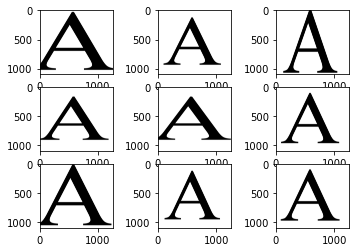

In [165]:
for category in kazakh_alphabet_u:
    path= os.path.join(upper_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = cv2.imread(os.path.join(path,img))  
            samples = np.expand_dims(img_array, 0)
            datagen = ImageDataGenerator(brightness_range=[0.1, 1.5])
            it = datagen.flow(samples, batch_size=1)
            img_matrix_list = []
            for i in range(9):
                # define subplot
                plt.subplot(330 + 1 + i)
                # generate batch of images
                batch = it.next()
                # convert to unsigned integers for viewing
                image = batch[0].astype('uint8')
                # plot raw pixel data
                img_matrix_list.append(image)
            for title, im in zip(range(9), img_matrix_list):
                imageio.imsave(upper_path+category+'/'+img+str(title)+'.png', im)

# expand dimension to one sample
samples = np.expand_dims(chosen_image, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
img_matrix_list = []
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    img_matrix_list.append(image)
    plt.imshow(image)
# show the figure
plt.show()


    

# Albumentations Augmentations

- Albumentations part adapted from my good friend Hongnan's notebbok in the Global Wheat Detection competition (https://www.kaggle.com/reighns/augmentations-data-cleaning-and-bounding-boxes#Bounding-Boxes-with-Albumentations)
- Added more augmentations which may be useful
- Added TensorFlow and Torchvision versions of the augmentations

In [171]:
albumentation_list = [A.RandomSunFlare(p=1), 
                      A.RandomFog(p=1), 
                      A.RandomBrightness(p=1),
                      A.RandomCrop(p=1,height = 512, width = 512), 
                      A.Rotate(p=1, limit=90),
                      A.RGBShift(p=1), 
                      A.RandomSnow(p=1),
                      A.HorizontalFlip(p=1), 
                      A.VerticalFlip(p=1), 
                      A.RandomContrast(limit = 0.5,p = 1),
                      A.HueSaturationValue(p=1,hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=50),
                      A.Cutout(p=1),
                      A.Transpose(p=1), 
                      A.JpegCompression(p=1),
                      A.CoarseDropout(p=1),
                      A.IAAAdditiveGaussianNoise(loc=0, scale=(2.5500000000000003, 12.75), per_channel=False, p=1),
                      A.IAAAffine(scale=1.0, translate_percent=None, translate_px=None, rotate=0.0, shear=0.0, order=1, cval=0, mode='reflect', p=1),
                      A.IAAAffine(rotate=90., p=1),
                      A.IAAAffine(rotate=180., p=1)]

In [173]:
#lower letter data augmentation
for category in kazakh_alphabet_l:
    path= os.path.join(lower_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = cv2.imread(os.path.join(path,img))  
            img_matrix_list = []
            bboxes_list = []
            for aug_type in albumentation_list:
                img = aug_type(image = img_array)['image']
                img_matrix_list.append(img)
            for title, im in zip(titles_list, img_matrix_list):
                imageio.imsave(lower_path+category+'/'+str(title)+'.png', im)

In [174]:
#upper letter data augmentation
for category in kazakh_alphabet_u:
    path= os.path.join(upper_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = cv2.imread(os.path.join(path,img))  
            img_matrix_list = []
            bboxes_list = []
            for aug_type in albumentation_list:
                img = aug_type(image = img_array)['image']
                img_matrix_list.append(img)
            for title, im in zip(titles_list, img_matrix_list):
                imageio.imsave(upper_path+category+'/'+str(title)+'.png', im)

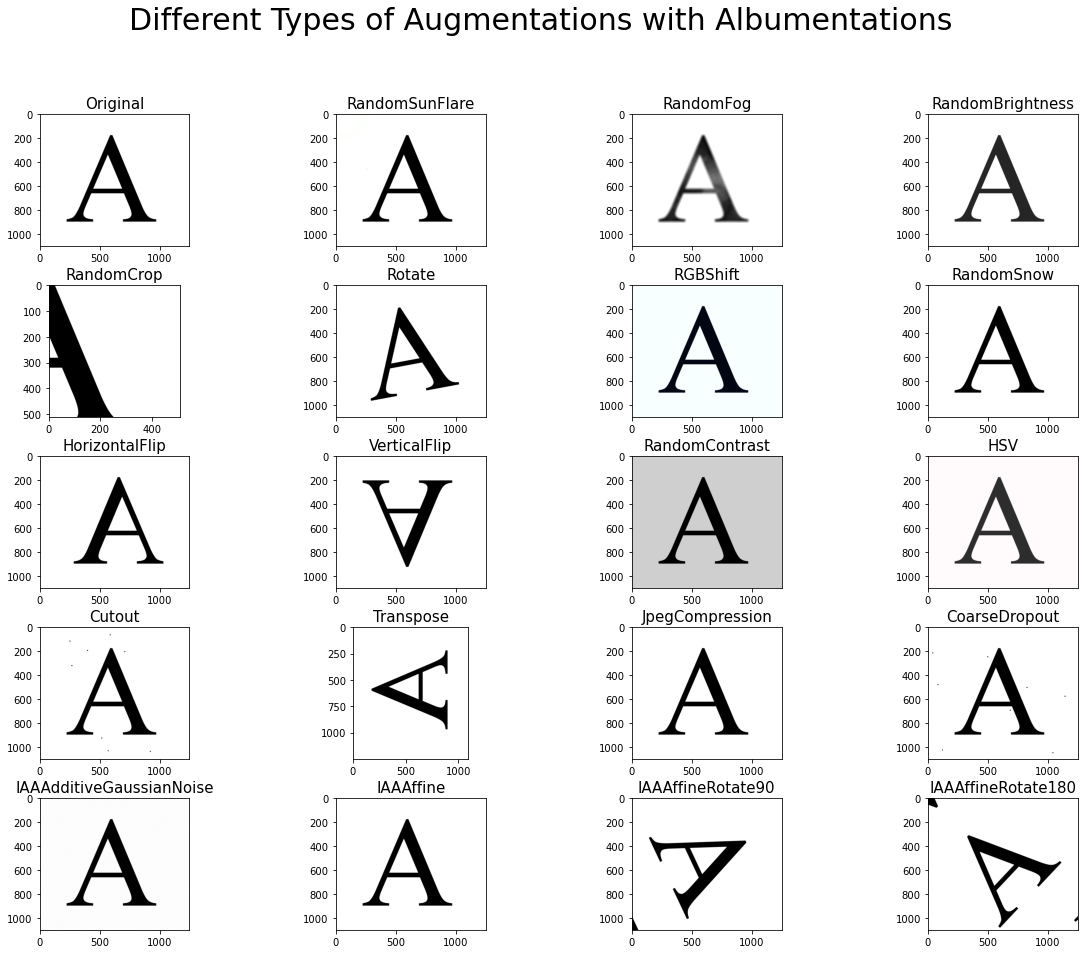

In [172]:
img_matrix_list = []
bboxes_list = []
for aug_type in albumentation_list:
    img = aug_type(image = chosen_image)['image']
    img_matrix_list.append(img)

img_matrix_list.insert(0,chosen_image)    

titles_list = ["Original","RandomSunFlare","RandomFog","RandomBrightness",
               "RandomCrop","Rotate", "RGBShift", "RandomSnow","HorizontalFlip", "VerticalFlip", "RandomContrast","HSV",
               "Cutout","Transpose","JpegCompression","CoarseDropout","IAAAdditiveGaussianNoise","IAAAffine","IAAAffineRotate90","IAAAffineRotate180"]



def plot_multiple_img(img_matrix_list, title_list, ncols, nrows=5,  main_title=""):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=nrows, ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize = 30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        #myaxes.savefig(my_path+title)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
        
    plt.show()
    
plot_multiple_img(img_matrix_list, titles_list, ncols = 4,main_title="Different Types of Augmentations with Albumentations")



# `imgaug` Based Augmentations

In [178]:
ia_trans_list = [iaa.blend.BlendAlpha(factor=(0.2, 0.8),
                                      foreground=iaa.Affine(rotate=(-30, 30)),
                                      per_channel=True),
                 iaa.Fliplr(1.),
                 iaa.Flipud(1.),
                 iaa.SimplexNoiseAlpha(iaa.Multiply(iap.Choice([0.5, 1.5]), per_channel=True)),
                 iaa.Crop(percent=(0., 0.3)),
                ]

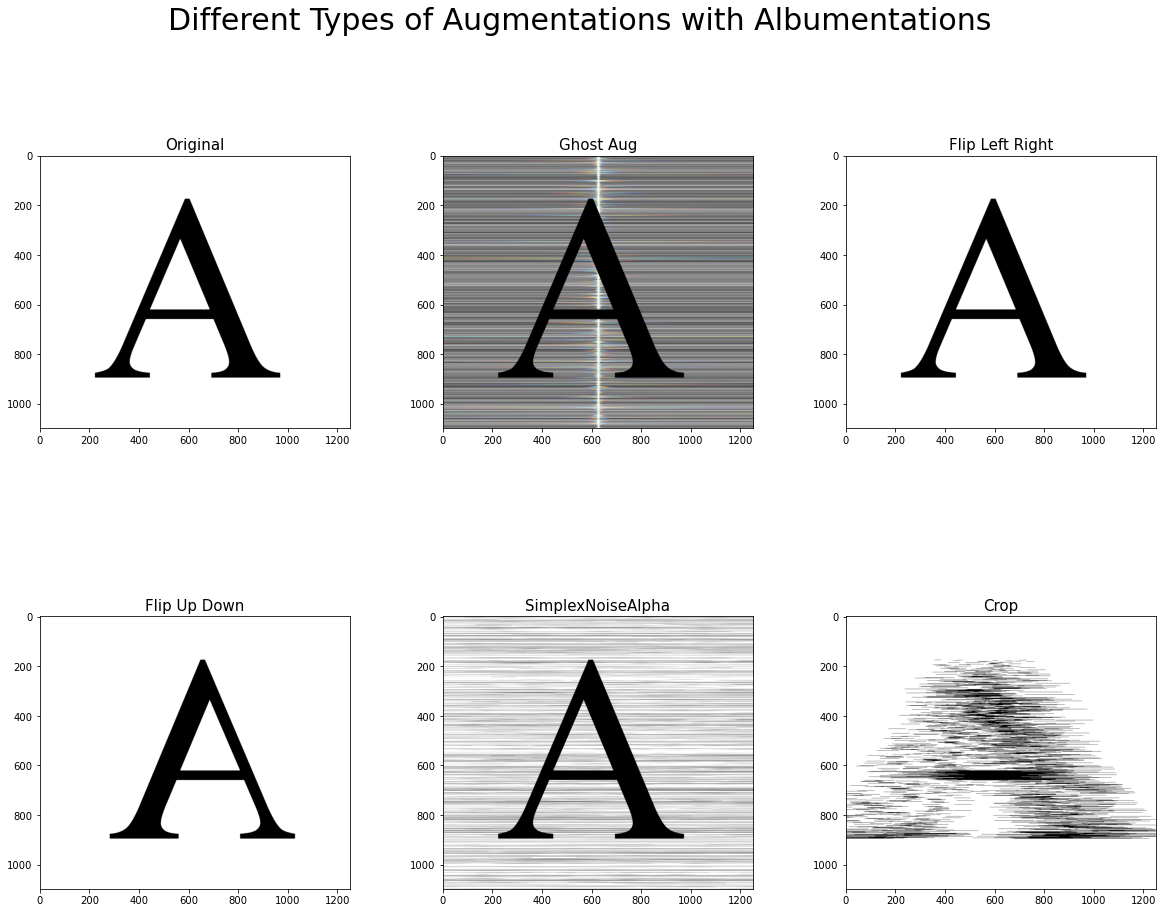

In [179]:
img_matrix_list = []
bboxes_list = []
for aug_type in ia_trans_list:
    # convert to tensor
    chosen_image = cv2.imread(image_path)
    iaa_seq = iaa.Sequential([aug_type])
    trans_img = iaa_seq.augment_images(chosen_image)
    img_matrix_list.append(trans_img)

img_matrix_list.insert(0, chosen_image)    

titles_list = ["Original","Ghost Aug","Flip Left Right","Flip Up Down","SimplexNoiseAlpha", "Crop"]

plot_multiple_img(img_matrix_list, titles_list, ncols = 3, nrows=2, main_title="Different Types of Augmentations with Albumentations")

# TensorFlow-Based Augmentations

In [195]:
image_path = '/Users/nursultan/Desktop/final project/kazakh letters/Upper/А/A.png'
chosen_image = cv2.imread(image_path)

tf_trans_list = [
    tf.image.rot90(chosen_image, k=1), # 90 degrees counter-clockwise
    tf.image.rot90(chosen_image, k=2), # 180 degrees counter-clockwise
    tf.image.rot90(chosen_image, k=3), # 270 degrees counter-clockwise
    tf.image.random_brightness(chosen_image, 0.5), 
    tf.image.random_contrast(chosen_image, 0.2, 0.5), 
    tf.image.random_flip_left_right(chosen_image, seed=42),
    tf.image.random_flip_up_down(chosen_image, seed=42),
    tf.image.random_hue(chosen_image, 0.5),
    tf.image.random_jpeg_quality(chosen_image, 35, 50), 
    tf.image.random_saturation(chosen_image, 5, 10), 
    tf.image.transpose(chosen_image),
]

In [219]:
#upper letter data augmentation
titles_list = ["Rotate90","Rotate180","Rotate270","RandomBrightness","RandomContrast","RandomLeftRightFlip","RandomUpDownFlip",
               "RandomHue","RandomJPEGQuality","RandomSaturation","Transpose"]
for category in kazakh_alphabet_u:
    path= os.path.join(upper_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = cv2.imread(os.path.join(path,img)) 
            if img_array is None:
                pass
            else:
                chosen_image  =img_array
                tf_trans_list = [
                        tf.image.rot90(chosen_image, k=1), # 90 degrees counter-clockwise
                        tf.image.rot90(chosen_image, k=2), # 180 degrees counter-clockwise
                        tf.image.rot90(chosen_image, k=3), # 270 degrees counter-clockwise
                        tf.image.random_brightness(chosen_image, 0.5), 
                        tf.image.random_contrast(chosen_image, 0.2, 0.5), 
                        tf.image.random_flip_left_right(chosen_image, seed=42),
                        tf.image.random_flip_up_down(chosen_image, seed=42),
                        tf.image.random_hue(chosen_image, 0.5),
                        tf.image.random_jpeg_quality(chosen_image, 35, 50), 
                        tf.image.random_saturation(chosen_image, 5, 10), 
                        tf.image.transpose(chosen_image),
                    ]
                img_matrix_list = []
                bboxes_list = []
                for aug_image in tf_trans_list:
                    img_matrix_list.append(aug_image)
            for title, im in zip(titles_list, img_matrix_list):
                imageio.imsave(upper_path+category+'/'+str(title)+'.png', im)

In [220]:
#lower letter data augmentation
titles_list = ["Rotate90","Rotate180","Rotate270","RandomBrightness","RandomContrast","RandomLeftRightFlip","RandomUpDownFlip",
               "RandomHue","RandomJPEGQuality","RandomSaturation","Transpose"]
for category in kazakh_alphabet_l:
    path= os.path.join(lower_path+category)
    for img in os.listdir(path):
        if img=='.DS_Store':
            pass
        else:
            img_array = cv2.imread(os.path.join(path,img)) 
            if img_array is None:
                pass
            else:
                chosen_image  =img_array
                tf_trans_list = [
                        tf.image.rot90(chosen_image, k=1), # 90 degrees counter-clockwise
                        tf.image.rot90(chosen_image, k=2), # 180 degrees counter-clockwise
                        tf.image.rot90(chosen_image, k=3), # 270 degrees counter-clockwise
                        tf.image.random_brightness(chosen_image, 0.5), 
                        tf.image.random_contrast(chosen_image, 0.2, 0.5), 
                        tf.image.random_flip_left_right(chosen_image, seed=42),
                        tf.image.random_flip_up_down(chosen_image, seed=42),
                        tf.image.random_hue(chosen_image, 0.5),
                        tf.image.random_jpeg_quality(chosen_image, 35, 50), 
                        tf.image.random_saturation(chosen_image, 5, 10), 
                        tf.image.transpose(chosen_image),
                    ]
                img_matrix_list = []
                bboxes_list = []
                for aug_image in tf_trans_list:
                    img_matrix_list.append(aug_image)
            for title, im in zip(titles_list, img_matrix_list):
                imageio.imsave(lower_path+category+'/'+str(title)+'.png', im)

In [190]:
def plot_multiple_img(img_matrix_list, title_list, ncols, nrows=3,  main_title=""):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=nrows, ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize = 30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
    plt.show()
    
#plot_multiple_img(img_matrix_list, titles_list, ncols = 4,main_title="Different Types of Augmentations with Albumentations")

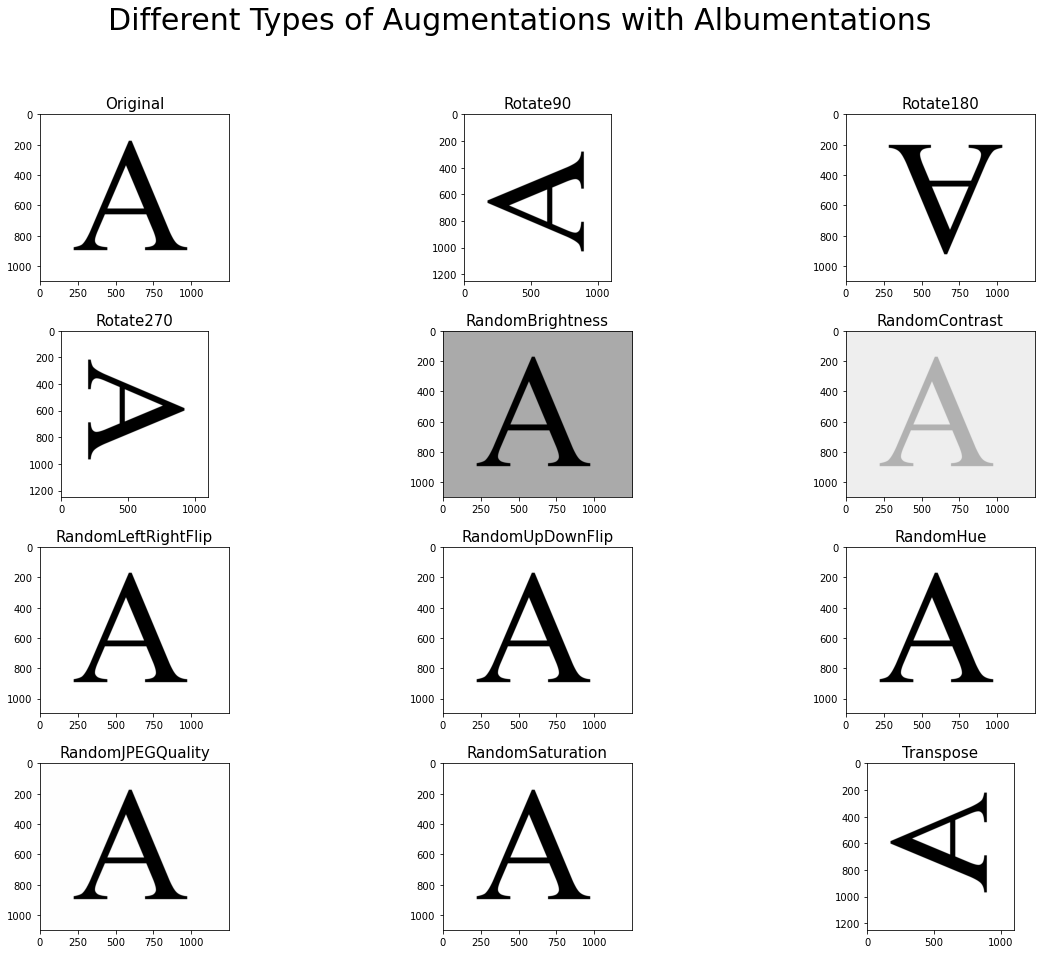

In [191]:
img_matrix_list = []
bboxes_list = []
for aug_image in tf_trans_list:
    img_matrix_list.append(aug_image)

img_matrix_list.insert(0, chosen_image)    

titles_list = ["Original","Rotate90","Rotate180","Rotate270","RandomBrightness","RandomContrast","RandomLeftRightFlip","RandomUpDownFlip",
               "RandomHue","RandomJPEGQuality","RandomSaturation","Transpose"]

plot_multiple_img(img_matrix_list, titles_list, ncols = 3, nrows=4, main_title="Different Types of Augmentations with Albumentations")